# Marketing A/B Testing Analysis

This project analyzes a marketing A/B testing dataset to evaluate the effectiveness of advertisements in driving conversions. The analysis involves hypothesis testing, effect size calculation and visualizations to provide insights into the ad campaign's performance.

## 1: Data Exploration & Preprocessing

### 1.1 Load the Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.proportion import proportions_ztest, proportion_confint, confint_proportions_2indep

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [3]:
df = df.drop(columns='Unnamed: 0')
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


### Explore the dataset

In [4]:
# Basic summary statistics
display(df.describe())

# Value counts for key columns
print(' Value counts for key columns')
display(df['test group'].value_counts())
display(df['converted'].value_counts())

# Check for missing values
print(' Missing values')
display(df.isnull().sum())


,user id,total ads,most ads hour
count,5.881010e+05,588101.000000,588101.000000
mean,1.310692e+06,24.820876,14.469061
std,2.022260e+05,43.715181,4.834634
min,9.000000e+05,1.000000,0.000000
25%,1.143190e+06,4.000000,11.000000
50%,1.313725e+06,13.000000,14.000000
75%,1.484088e+06,27.000000,18.000000
max,1.654483e+06,2065.000000,23.000000


 Value counts for key columns


test group
ad     564577
psa     23524
Name: count, dtype: int64

converted
False    573258
True      14843
Name: count, dtype: int64

 Missing values


user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

## 2: Hypothesis Testing (Z-Test for Proportions)
### 2.1 Calculate Conversion Rates

In [5]:
# Calculate conversion rates for the ad and PSA groups
ad_group = df[df['test group'] == 'ad']
psa_group = df[df['test group'] == 'psa']

ad_conversion_rate = ad_group['converted'].mean()
psa_conversion_rate = psa_group['converted'].mean()

print(f"Ad Group Conversion Rate: {ad_conversion_rate}")
print(f"PSA Group Conversion Rate: {psa_conversion_rate}")

Ad Group Conversion Rate: 0.025546559636683747
PSA Group Conversion Rate: 0.01785410644448223


### 2.2 Perform Z-Test

In [6]:
# Perform Z-Test
ad_converted = ad_group['converted'].sum()
psa_converted = psa_group['converted'].sum()

n_ad = len(ad_group)
n_psa = len(psa_group)

count = [ad_converted, psa_converted]
nobs = [n_ad, n_psa]
z_stat, p_value = proportions_ztest(count, nobs)

print(f"Z-Statistic: {z_stat}")
print(f"P-Value: {p_value}")


Z-Statistic: 7.3700781265454145
P-Value: 1.7052807161559727e-13


The ad campaign had a statistically significant impact on conversion rates and the likelihood that this result is due to random chance is extremely low (given the tiny P-value). The ads seem to be driving more conversions than the PSA.

## 3: Effect Size and Confidence Intervals
### 3.1 Calculate Effect Size (Cohen's h)


In [7]:
# Function to calculate Cohen's h
def cohens_h(p1, p2):
    return 2 * (np.arcsin(np.sqrt(p1)) - np.arcsin(np.sqrt(p2)))

# Calculate Cohen's h for the difference in conversion rates
effect_size = cohens_h(ad_conversion_rate, psa_conversion_rate)
print(f"Effect Size (Cohen's h): {effect_size}")

Effect Size (Cohen's h): 0.053002578606030915


### 3.2 Confidence Interval for Conversion Rates

In [8]:
# Confidence interval for ad group
ci_ad_lower, ci_ad_upper = proportion_confint(ad_converted, n_ad, alpha=0.05)

# Confidence interval for PSA group
ci_psa_lower, ci_psa_upper = proportion_confint(psa_converted, n_psa, alpha=0.05)

print(f"Ad Group 95% CI: [{ci_ad_lower}, {ci_ad_upper}]")
print(f"PSA Group 95% CI: [{ci_psa_lower}, {ci_psa_upper}]")


Ad Group 95% CI: [0.0251349995427061, 0.025958119730661394]
PSA Group 95% CI: [0.016161914715211324, 0.019546298173753137]


### 3.3 Confidence Interval for the Difference in proportions

In [9]:
# Confidence interval for the difference in conversion rates
ci_diff_lower, ci_diff_upper = confint_proportions_2indep(ad_converted, n_ad, psa_converted, n_psa, method='wald')

print(f"95% CI for Difference in Conversion Rates: [{ci_diff_lower}, {ci_diff_upper}]")


95% CI for Difference in Conversion Rates: [0.005950932431611005, 0.00943397395279203]


##### Conclusions:
* The ads did have a significant effect on conversion rates, but the magnitude of that effect is small.
* The results are statistically significant (P-value < 0.05), meaning the observed difference is not likely due to chance.
* The practical impact (as shown by Cohen's h) is small, so while the ads worked better than the PSA, the overall gain in conversions is modest.

## 4: Visualizations

### 4.1 Conversion Rate Bar Plot

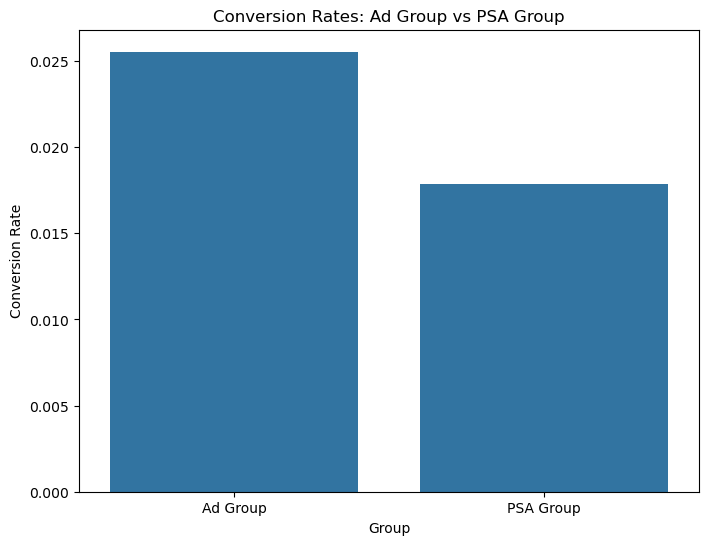

In [10]:
# Conversion rates
conversion_rates = pd.DataFrame({
    'Group': ['Ad Group', 'PSA Group'],
    'Conversion Rate': [ad_conversion_rate, psa_conversion_rate]
})

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x='Group', y='Conversion Rate', data=conversion_rates)
plt.title('Conversion Rates: Ad Group vs PSA Group')
plt.ylabel('Conversion Rate')
plt.show()


### 4.2 Distribution of total ads seen

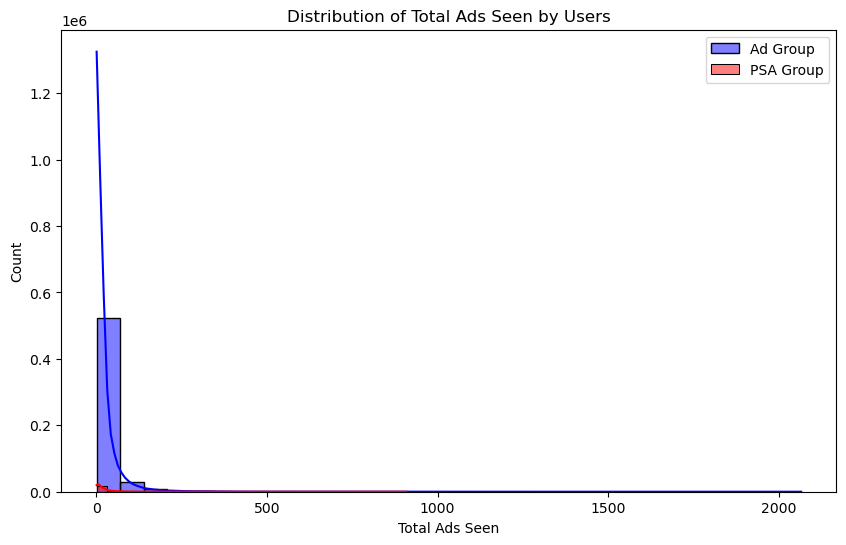

In [11]:
plt.figure(figsize=(10,6))

# Histogram for total ads seen by both groups
sns.histplot(ad_group['total ads'], color='blue', label='Ad Group', kde=True, bins=30)
sns.histplot(psa_group['total ads'], color='red', label='PSA Group', kde=True, bins=30)

plt.title('Distribution of Total Ads Seen by Users')
plt.xlabel('Total Ads Seen')
plt.ylabel('Count')
plt.legend()
plt.show()


### 4.3 Confidence Interval

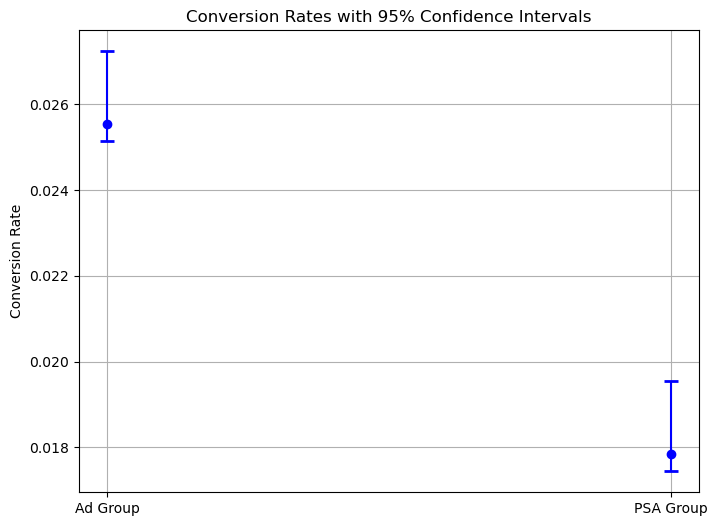

In [12]:
# Plot conversion rates with confidence intervals
plt.figure(figsize=(8,6))

# Conversion rates with error bars (confidence intervals)
plt.errorbar(x=['Ad Group', 'PSA Group'], 
             y=[ad_conversion_rate, psa_conversion_rate],
             yerr=[(ad_conversion_rate - ci_ad_lower, ci_ad_upper - ad_conversion_rate),
                   (psa_conversion_rate - ci_psa_lower, ci_psa_upper - psa_conversion_rate)],
             fmt='o', capsize=5, capthick=2, color='blue')

plt.title('Conversion Rates with 95% Confidence Intervals')
plt.ylabel('Conversion Rate')
plt.grid(True)
plt.show()